In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part1

### (a).

In [83]:
class rr:
    def __init__(self, lambda_1) -> None:
        self.lambda_1 = lambda_1
    

    def fit(self, X, y):
        self.n, self.m = X.shape
        self.U, S, self.Vh = np.linalg.svd(X, full_matrices=False)
        self.V = self.Vh.T
        self.S = S**2/(S**2+self.lambda_1)
        self.S_lamda = np.diag(self.S)
        self.W = self.V.dot(self.S_lamda).dot(self.U.T).dot(y)
    
    def predict(self, X):
        return X.dot(self.W)
    
    def get_weight(self):
        return self.W
    
    def get_df(self):
        return sum(sum(self.S_lamda))


In [168]:
X_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
X_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

In [99]:
# y_predict = rr_model.predict(X_test)

df = []
weight = pd.DataFrame()
for i in range(5000):
    rr_model = rr(i)
    rr_model.fit(X_train, y_train)
    weight = pd.concat([weight, pd.DataFrame(rr_model.get_weight().T)], axis = 0, ignore_index=True)
    df.append(rr_model.get_df())
    
weight.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year_made', 'bias']

In [100]:
weight

,cylinders,displacement,horsepower,weight,acceleration,year_made,bias
0,-49.008038,-49.684332,-50.296367,-78.516517,18.163425,58.626164,0.920757
1,-49.070442,-50.195952,-50.524990,-77.674428,18.049310,58.449462,0.915016
2,-49.146314,-50.635310,-50.728849,-76.903262,17.953052,58.278216,0.910185
3,-49.230745,-51.016180,-50.910748,-76.193097,17.872075,58.111749,0.906109
4,-49.320289,-51.349006,-51.073159,-75.535903,17.804265,57.949509,0.902663
...,...,...,...,...,...,...,...
4995,-12.680208,-12.968804,-12.562905,-12.879327,7.588249,7.627523,0.442949
4996,-12.678240,-12.966791,-12.560959,-12.877318,7.587108,7.626283,0.442884
4997,-12.676273,-12.964778,-12.559013,-12.875309,7.585966,7.625043,0.442819
4998,-12.674307,-12.962766,-12.557069,-12.873301,7.584825,7.623804,0.442754


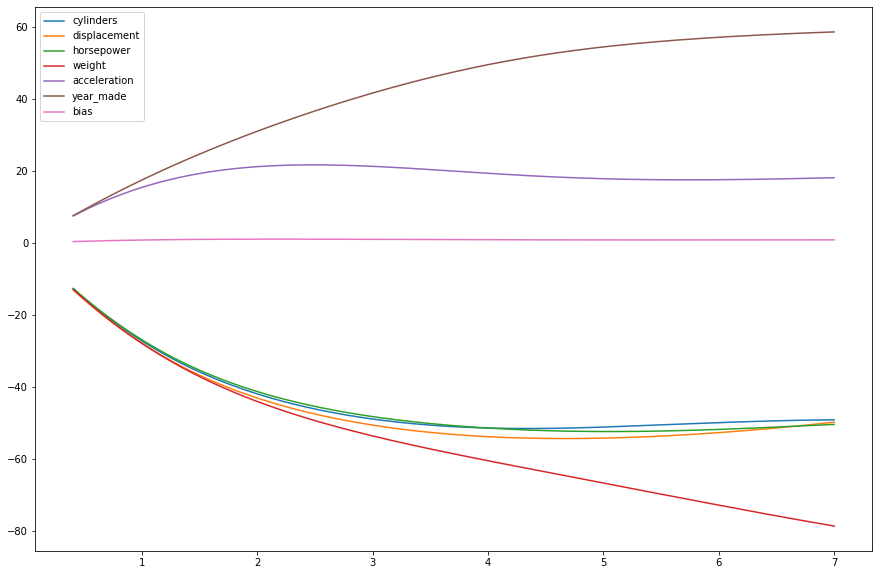

In [101]:
plt.figure(figsize=(15,10))
for column in weight.columns:
    plt.plot(df, weight[column], label = column)
plt.legend()
plt.show()

### (b).

####  year_made and weight stand out of others because they have higher weights which means they matters more when deciding y.

In [106]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [123]:
rmse_list = []
for i in range(50):
    rr_model = rr(i)
    rr_model.fit(X_train, y_train)
    rmse = RMSE(y_test, rr_model.predict(X_test))[0]
    rmse_list.append(rmse)


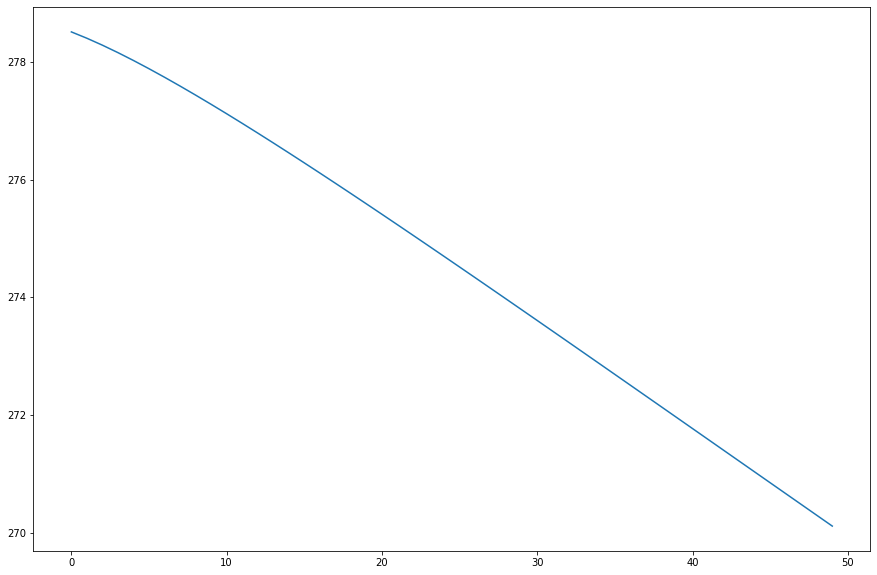

In [128]:
plt.figure(figsize=(15,10))
plt.plot(range(50),rmse_list)

In [193]:
class pr:
    def __init__(self, lambda_1, degree) -> None:
        self.lambda_1 = lambda_1
        self.degree = degree
    
    def x_poly(self, X):
        bias = X.iloc[: , -1]
        X = X.iloc[: , :-1]
        for i in range(2, self.degree+1):
            X_temp = X ** i
            X = np.hstack((X, X_temp))
        print(X.shape)
        print(bias.shape)
        print(type(bias))
        X = np.hstack((X, pd.DataFrame(bias)))
        return X

    def fit(self, X, y):
        X = self.x_poly(X)
        self.n, self.m = X.shape
        self.U, S, self.Vh = np.linalg.svd(X, full_matrices=False)
        self.V = self.Vh.T
        self.S = S**2/(S**2+self.lambda_1)
        self.S_lamda = np.diag(self.S)
        self.W = self.V.dot(self.S_lamda).dot(self.U.T).dot(y)
    
    def predict(self, X):
        return X.dot(self.W)
    
    def get_weight(self):
        return self.W
    
    def get_df(self):
        return sum(sum(self.S_lamda))

In [194]:
df = []
weight = pd.DataFrame()
for i in range(5000):
    pr_model = pr(i, 2)
    pr_model.fit(X_train, y_train)
    weight = pd.concat([weight, pd.DataFrame(rr_model.get_weight().T)], axis = 0, ignore_index=True)
    df.append(rr_model.get_df())
    
weight.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year_made', 'bias']

(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Series'>
(350, 12)
(350,)
<class 'pandas.core.series.Se

KeyboardInterrupt: 

In [159]:
X_train_temp = X_train
# X_train_temp[:-1].head()
bias = X_train_temp.iloc[: , -1]

In [165]:
for i in range(2, 3):
    X_temp = X_train_temp.iloc[: , :-1] ** i

In [166]:
X_temp.head()

,0,1,2,3,4,5
0,0.095840,0.134740,0.207435,0.040333,0.547482,0.654238
1,0.095834,0.129025,0.013482,0.001472,0.027639,0.654238
2,0.744614,0.995565,0.801938,1.500870,0.312123,0.070713
3,0.744614,0.478836,0.183073,0.316136,0.025590,1.191154
4,0.744614,0.848849,0.404127,1.565001,0.171139,0.672285
